In [1]:
# import necessary libraries
import time
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

In [2]:
# load data in pandas dataframe
df_train = pd.read_csv('train_wn75k28.csv')
df_train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [3]:
# get information about the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [4]:
# get statistical information about numerical columns in the dataset
df_train.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [5]:
# check for duplicates
df_train.duplicated().sum()

0

In [6]:
# check for column names that may have some missing values and number of unique values in that column
df_train.nunique()[df_train.nunique() != len(df_train)].sort_values(ascending=False)

signup_date             1800
created_at               365
campaign_var_1            16
campaign_var_2            15
user_activity_var_11       5
user_activity_var_6        4
products_purchased         4
user_activity_var_1        4
user_activity_var_8        3
user_activity_var_7        3
user_activity_var_5        3
user_activity_var_4        2
user_activity_var_3        2
user_activity_var_9        2
user_activity_var_10       2
user_activity_var_2        2
user_activity_var_12       2
buy                        2
dtype: int64

In [7]:
# check for column names that do not have any missing values and all values are unique
df_train.nunique()[df_train.nunique()==len(df_train)]

id    39161
dtype: int64

In [8]:
# check for number of missing values in each column in descending order
df_train.isnull().sum().sort_values(ascending=False)

products_purchased      20911
signup_date             15113
id                          0
user_activity_var_6         0
user_activity_var_12        0
user_activity_var_11        0
user_activity_var_10        0
user_activity_var_9         0
user_activity_var_8         0
user_activity_var_7         0
user_activity_var_4         0
user_activity_var_5         0
created_at                  0
user_activity_var_3         0
user_activity_var_2         0
user_activity_var_1         0
campaign_var_2              0
campaign_var_1              0
buy                         0
dtype: int64

In [9]:
df_train_date_features = df_train[['signup_date', 'created_at']]

In [10]:
df_train_date_features['signup_date'] = pd.to_datetime(df_train_date_features['signup_date'])
df_train_date_features['created_at'] = pd.to_datetime(df_train_date_features['created_at'])

In [11]:
df_train_date_features['signup_year'] = df_train_date_features['signup_date'].dt.year
df_train_date_features['signup_month'] = df_train_date_features['signup_date'].dt.month
df_train_date_features['signup_week'] = df_train_date_features['signup_date'].dt.week
df_train_date_features['signup_day'] = df_train_date_features['signup_date'].dt.day
df_train_date_features['signup_dayofweek'] = df_train_date_features['signup_date'].dt.dayofweek

In [12]:
df_train_date_features['created_year'] = df_train_date_features['created_at'].dt.year
df_train_date_features['created_month'] = df_train_date_features['created_at'].dt.month
df_train_date_features['created_week'] = df_train_date_features['created_at'].dt.week
df_train_date_features['created_day'] = df_train_date_features['created_at'].dt.day
df_train_date_features['created_dayofweek'] = df_train_date_features['created_at'].dt.dayofweek

In [13]:
df_train_date_features = df_train_date_features[['signup_year', 'signup_month', 'signup_week', 'signup_day', 'signup_dayofweek',
                                  'created_year', 'created_month', 'created_week', 'created_day', 'created_dayofweek']]

In [14]:
df_train_date_features.head()

,signup_year,signup_month,signup_week,signup_day,signup_dayofweek,created_year,created_month,created_week,created_day,created_dayofweek
0,2020.0,9.0,39.0,24.0,3.0,2021,1,53,1,4
1,2020.0,9.0,38.0,19.0,5.0,2021,1,53,1,4
2,2021.0,8.0,32.0,11.0,2.0,2021,1,53,1,4
3,2017.0,10.0,40.0,4.0,2.0,2021,1,53,1,4
4,2020.0,6.0,24.0,8.0,0.0,2021,1,53,1,4


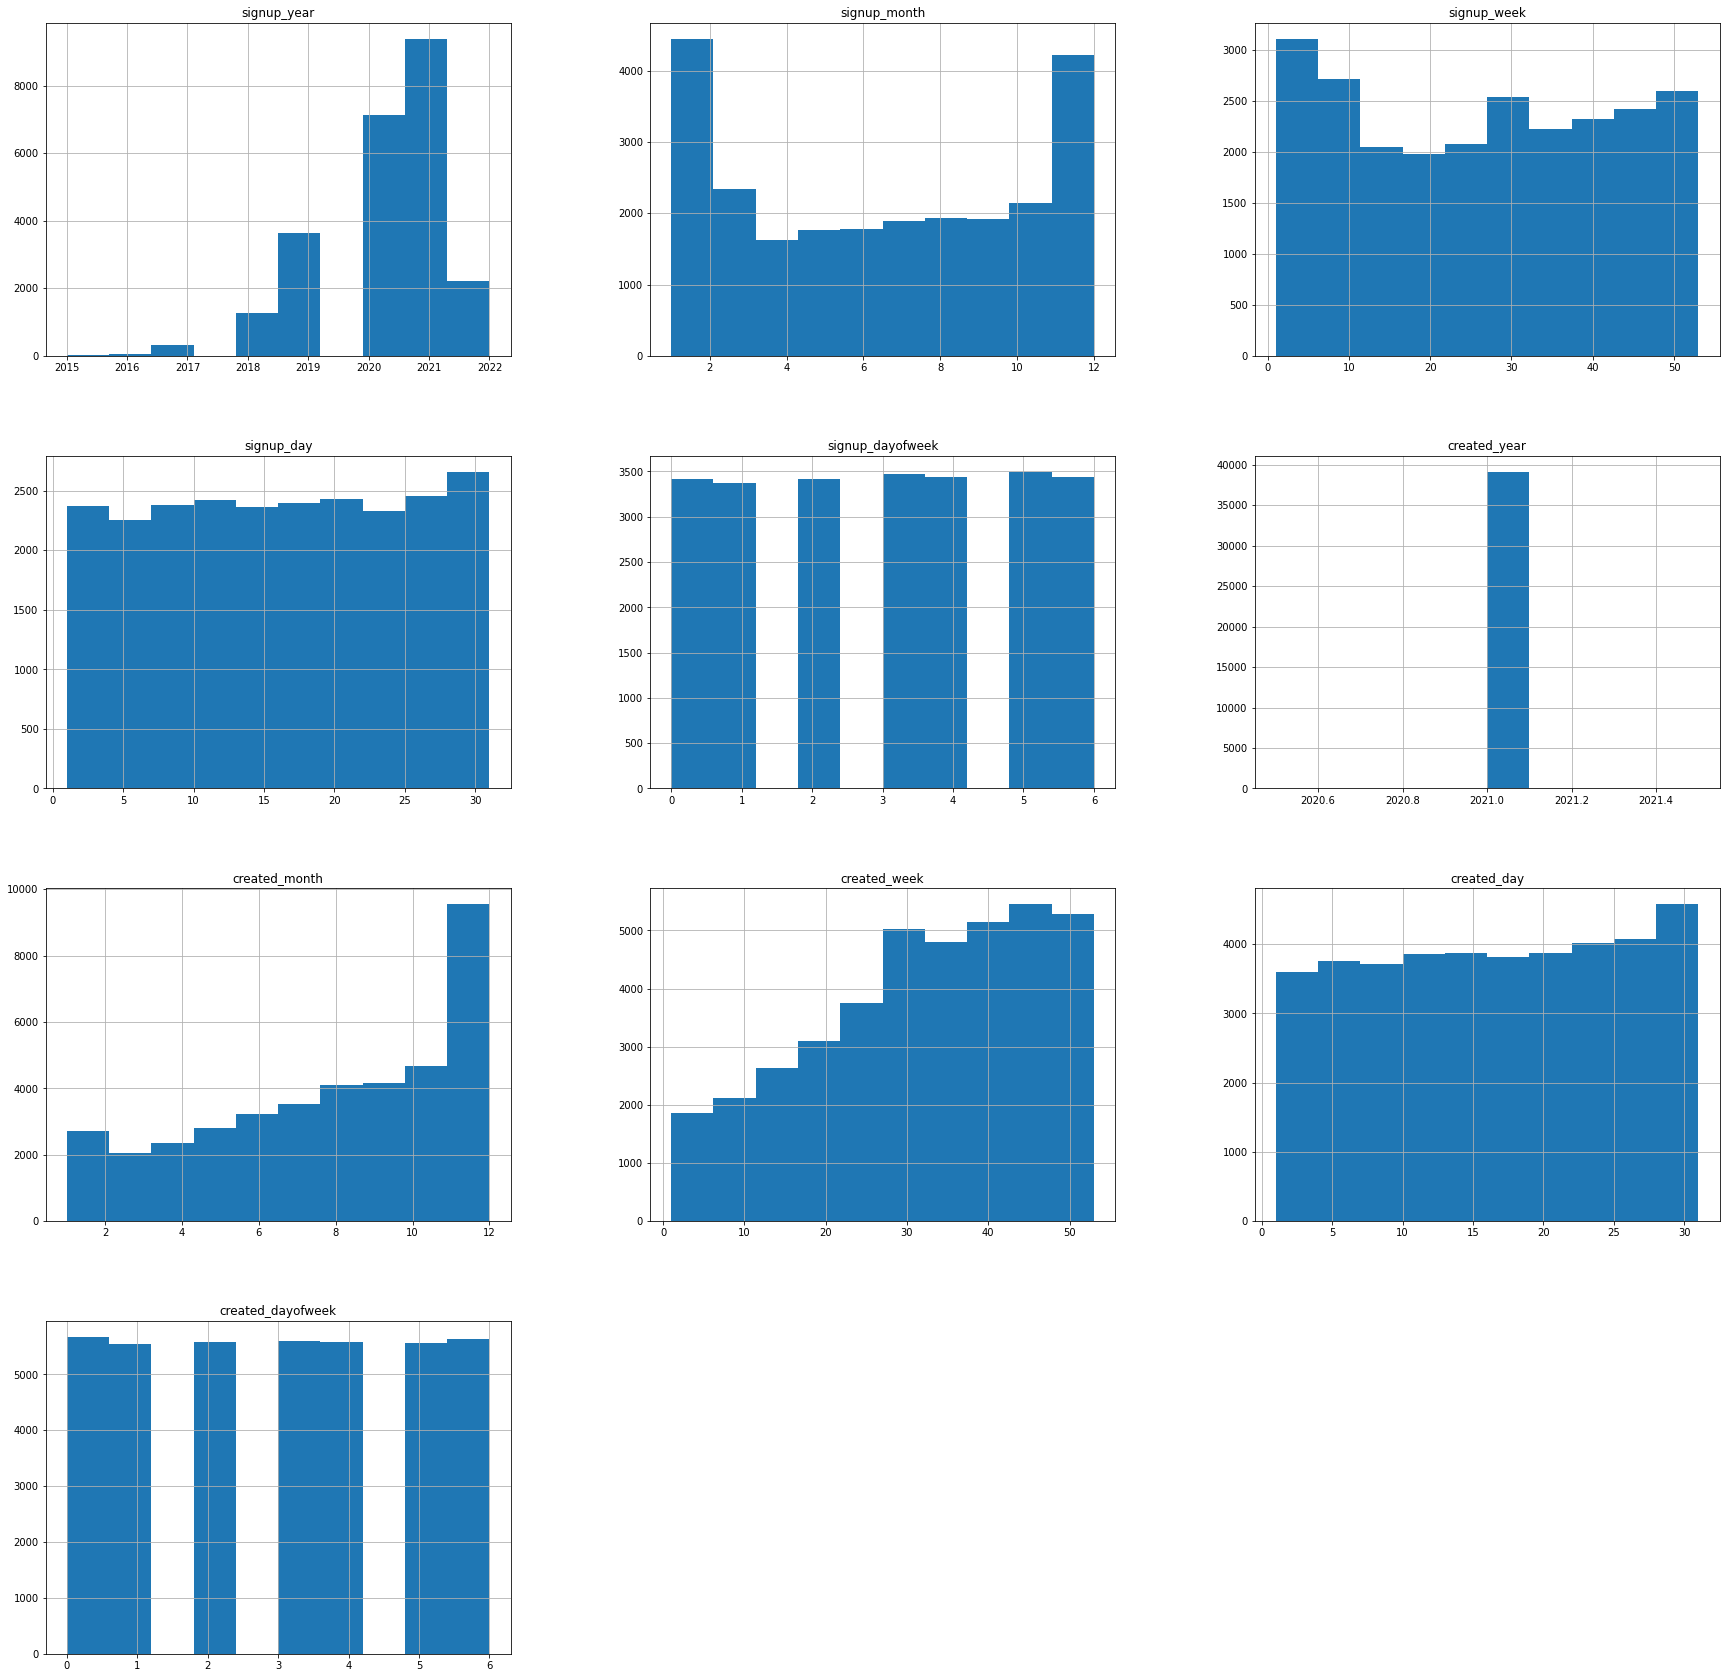

In [15]:
fig = plt.figure(figsize=(30,30))
ax = fig.gca()
h = df_train_date_features.hist(ax=ax)

In [16]:
def replace_null_values(df):
    """
    Summary:
        utility function to replace null values for 'products_purchased' in the dataset
    Parameters:
        df : Dataframe to be used
    Returns: 
        df : Dataframe with replaced null values
    """
    # replace null with zero
    df['products_purchased'] = df['products_purchased'].fillna(0)
    return df

def impute_signup_date(df):
    """
    Summary:
        utility function to impute signup_date column with its mean
    Parameters:
        df : Dataframe to be used
    Returns: 
        df : Dataframe with imputed date values
    """
    df['signup_date'] = pd.to_datetime(df['signup_date'])
    # replace null with mean 
    df['signup_date'] = df['signup_date'].fillna(df['signup_date'].mean())
    return df

def calculate_timedelta_feature(df):
    """
    Summary:
        utility function to calculate time_delta from 'created_at' and 'signup_date' features 
    Parameters:
        df : Dataframe to be used
    Returns: 
        df : Dataframe with 'time_delta' derived feature
    """
    df['time_delta'] = pd.to_datetime(df['created_at']) - pd.to_datetime(df['signup_date'])
    df['time_delta'] = df['time_delta'].dt.days
    return df

def create_features_from_date(df):
    """
    Summary:
        utility function to create 'created_month' and 'created_week' features using 'created_at' column
    Parameters:
        df : Dataframe to be used
    Returns: 
        df : Dataframe with new features
    """
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['created_month'] = df['created_at'].dt.month
    df['created_week'] = df['created_at'].dt.week
    df['created_day'] = df['created_at'].dt.day
    df['signup_date'] = pd.to_datetime(df['signup_date'])
    df['signup_month'] = df['signup_date'].dt.month
    df['signup_week'] = df['signup_date'].dt.week
    df['signup_day'] = df['signup_date'].dt.day
    return df

def drop_features(df, drop_columns):
    """
    Summary:
        utility function to drop given features
    Parameters:
        df : Dataframe to be used
    Returns: 
        df : preprocessed Dataframe with dropped given features 
    """
    df = df.drop(drop_columns, axis=1)
    return df

def preprocess(df):
    """
    Summary:
        utility function to preprocess dataset
    Parameters:
        df : Dataframe to be used
    Returns: 
        df : preprocessed Dataframe 
    """
    df_preprocessed = replace_null_values(df)
    df_preprocessed = impute_signup_date(df_preprocessed)
    df_preprocessed = calculate_timedelta_feature(df_preprocessed)
    df_preprocessed = create_features_from_date(df_preprocessed)
    # drop columns not required for predictive modelling
    df_preprocessed = drop_features(df_preprocessed, drop_columns=['id', 'signup_date', 'created_at'])
    return df_preprocessed

In [17]:
# preprocess training data
df_train_cleaned  = preprocess(df_train)

In [18]:
""" NOTE: The first few days of the year are counted as 53 as that week begins in the prior year. 
          So, we replace '53' with '1'
"""
df_train_cleaned['created_week'] = df_train_cleaned['created_week'].replace(to_replace =53, value = 1)

In [19]:
# view cleaned dataset
df_train_cleaned.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,...,user_activity_var_11,user_activity_var_12,buy,time_delta,created_month,created_week,created_day,signup_month,signup_week,signup_day
0,1,2,2.0,0,0,0,0,0,0,1,...,0,0,0,99,1,1,1,9,39,24
1,2,1,2.0,1,0,1,0,0,0,1,...,0,0,0,104,1,1,1,9,38,19
2,9,3,3.0,1,0,0,0,0,0,0,...,0,0,0,-222,1,1,1,8,32,11
3,6,7,2.0,0,0,0,0,0,0,0,...,0,0,0,1185,1,1,1,10,40,4
4,4,6,0.0,0,0,0,0,0,0,1,...,1,0,0,207,1,1,1,6,24,8


In [20]:
# check for missing values again
df_train_cleaned.isnull().sum().sort_values(ascending=False)

campaign_var_1          0
user_activity_var_10    0
signup_week             0
signup_month            0
created_day             0
created_week            0
created_month           0
time_delta              0
buy                     0
user_activity_var_12    0
user_activity_var_11    0
user_activity_var_9     0
campaign_var_2          0
user_activity_var_8     0
user_activity_var_7     0
user_activity_var_6     0
user_activity_var_5     0
user_activity_var_4     0
user_activity_var_3     0
user_activity_var_2     0
user_activity_var_1     0
products_purchased      0
signup_day              0
dtype: int64

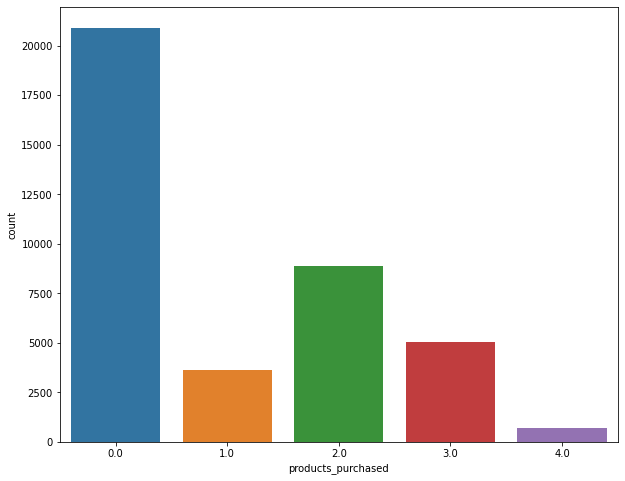

In [21]:
# plot countplot for 'products_purchased'
plt.figure(figsize=(10,8))
sns.countplot(x ='products_purchased', data = df_train_cleaned)
plt.show()

In [22]:
df_train_cleaned["buy"].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

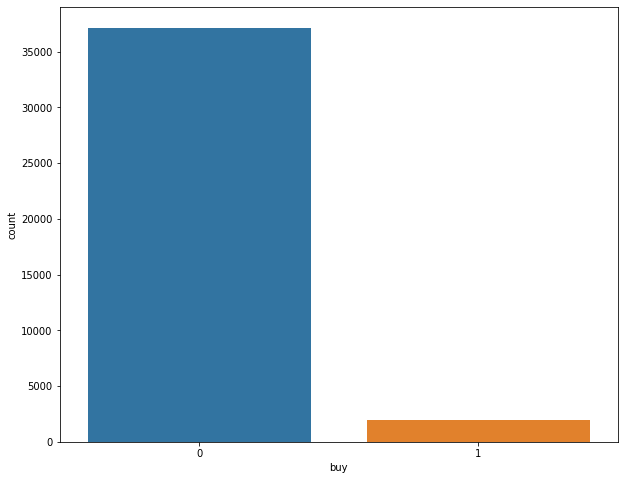

In [23]:
# plot countplot for target variable 'buy'
plt.figure(figsize=(10,8))
sns.countplot(x ='buy', data = df_train_cleaned)
plt.show()

#### How different features are correlated with each other?
Let's find the correlation matrix for all the features. We'll use df.corr() function to get the matrix.

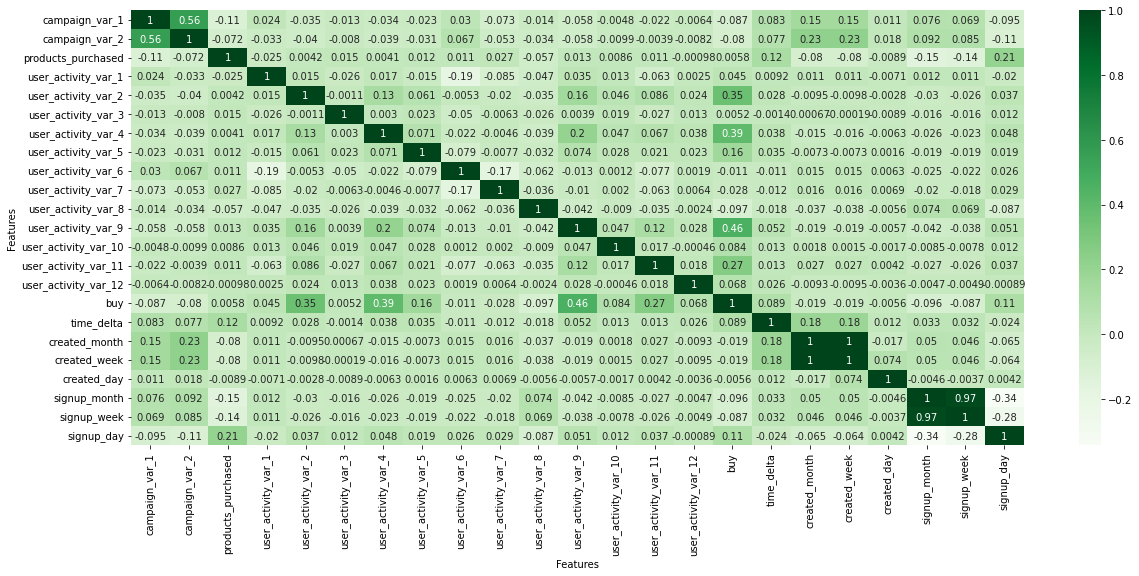

In [24]:
corr = df_train_cleaned.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

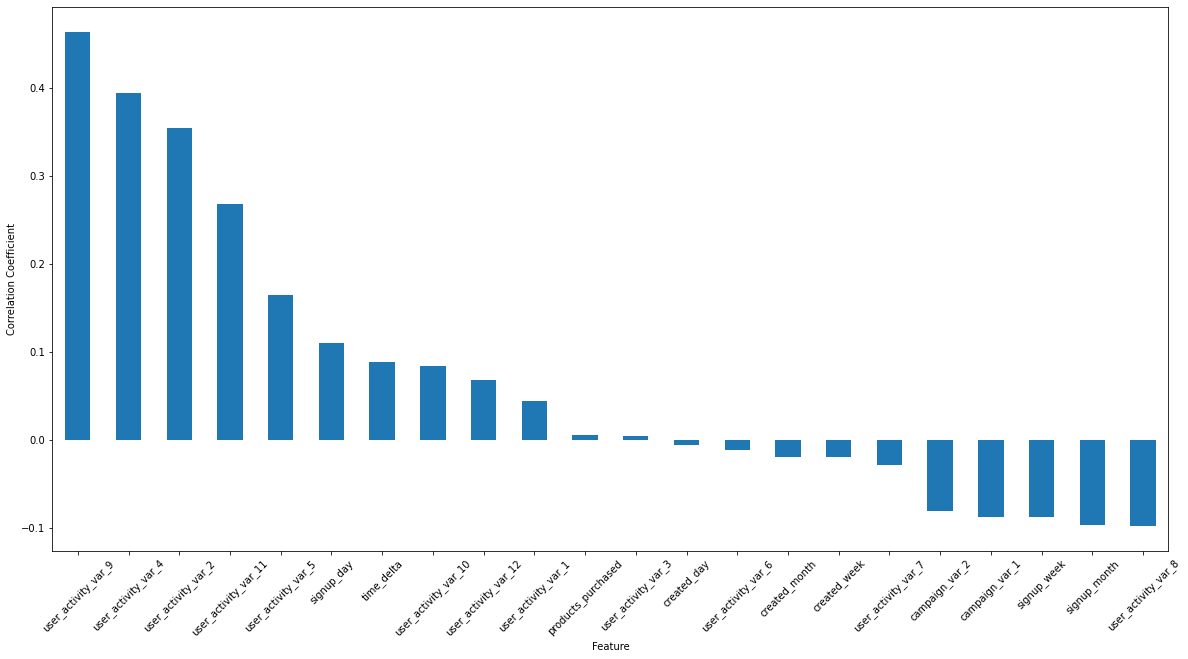

In [25]:
plt.figure(figsize=(20,10))
top_correlated_features = df_train_cleaned.corr()['buy'].sort_values(ascending = False)[1:]
top_correlated_features.plot(kind = 'bar');
plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

#### Observations:
1. campaign_var_1 and campaign_var_2 are highly correlated with each other (corr = 0.56) 
2. User activities 9,4,2 and 11 are highly correlated with target variable ‘buy’. (Positive Correlation) 
3. created_month and created_week have correlation 1 

#### Are there any outlier present in the dataset?

In [26]:
def view_feature_plots(feature):
    """
    Summary:
        utility function to plot distribution and boxplots for each feature in the dataset  
    
    Parameters:
        feature (Series): Pandas Series for given feature
    """
    plt.figure(figsize=(20, 7))
    
    # plot distribution using mean and standard deviation
    plt.subplot(1, 2, 1)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    plt.axvline(mu, linestyle = '-', color = 'green', label ='mean')
    plt.axvline(sigma, linestyle = '-', color = 'red', label = 'standard deviation')
    plt.title(f'{feature.name} distribution plot')

    # plot boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()

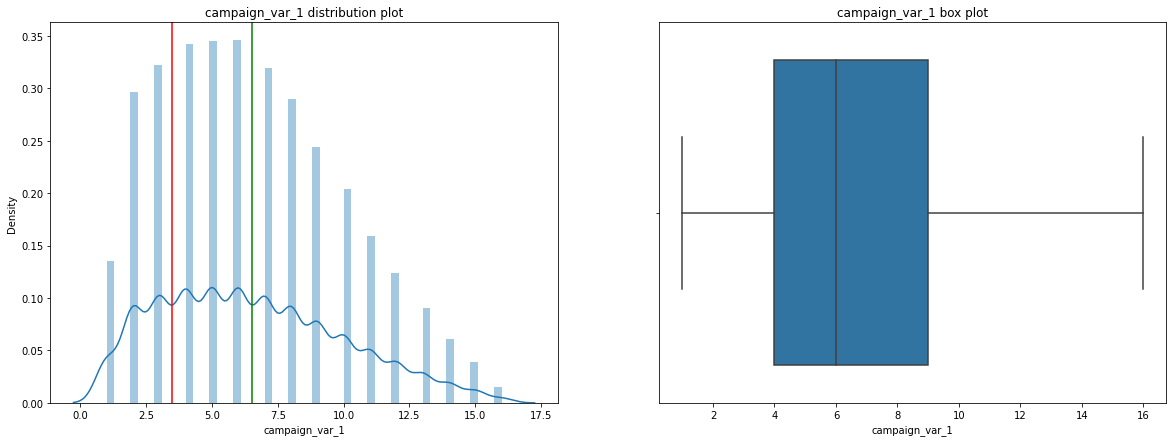

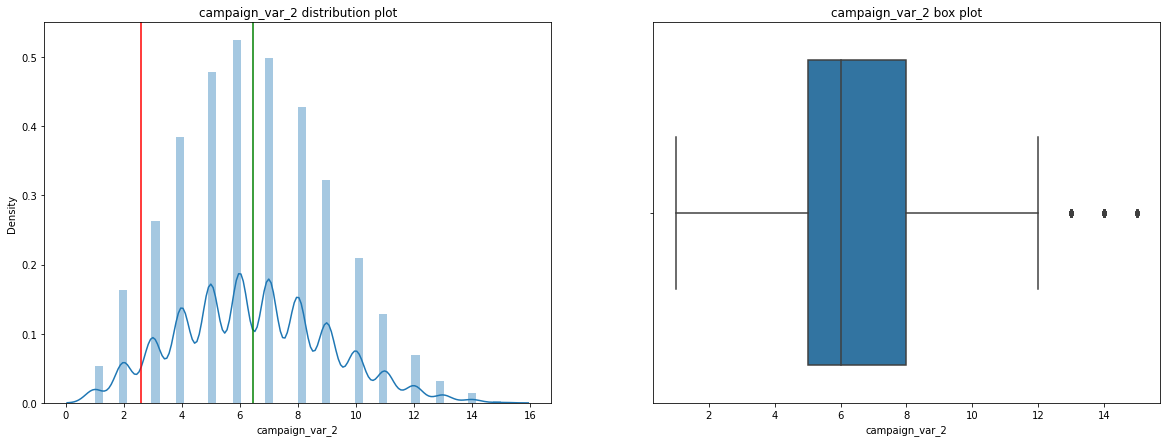

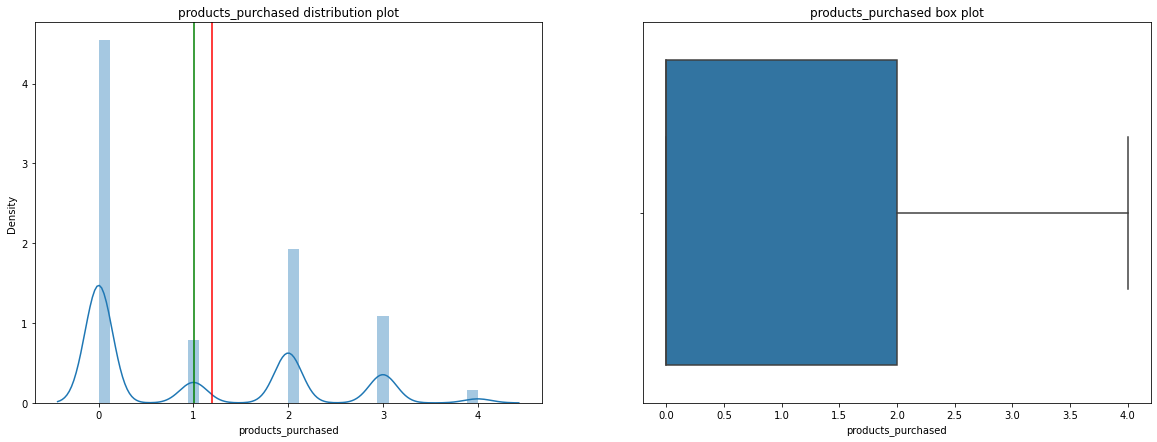

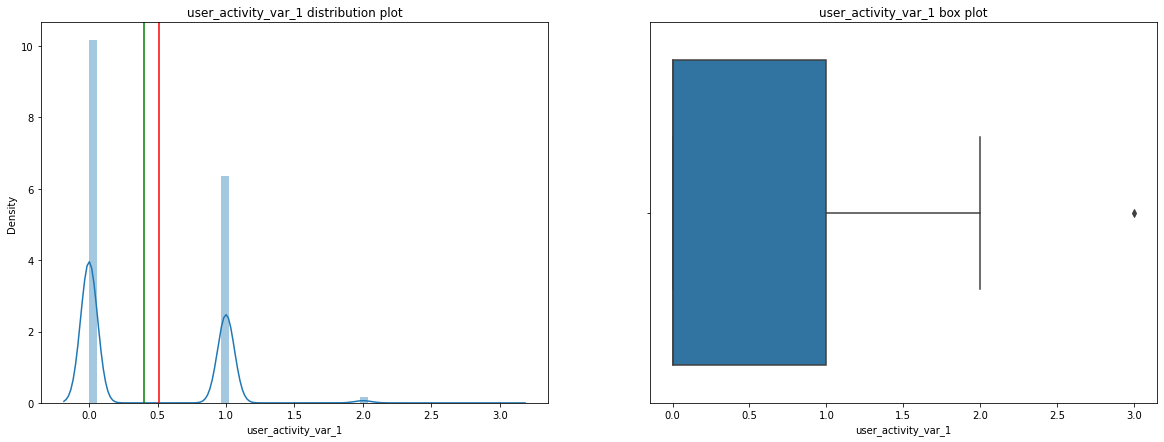

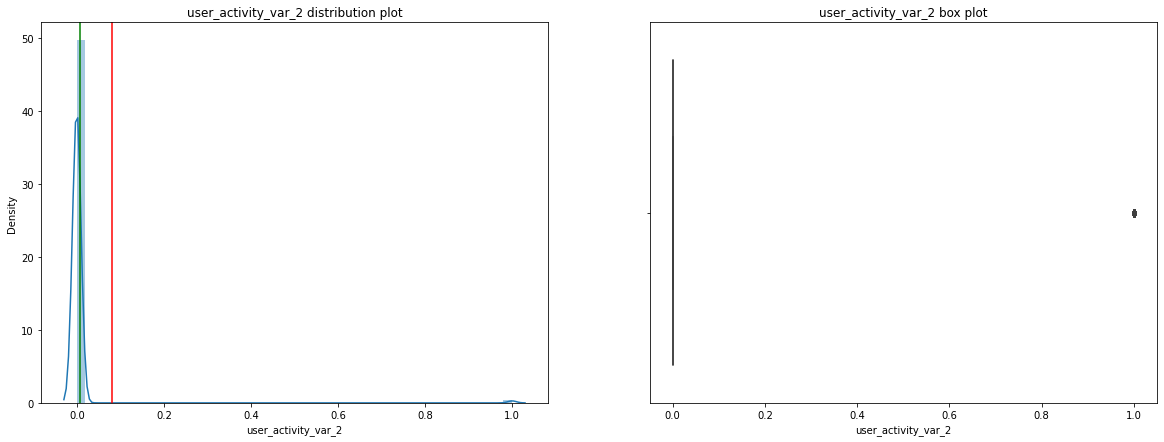

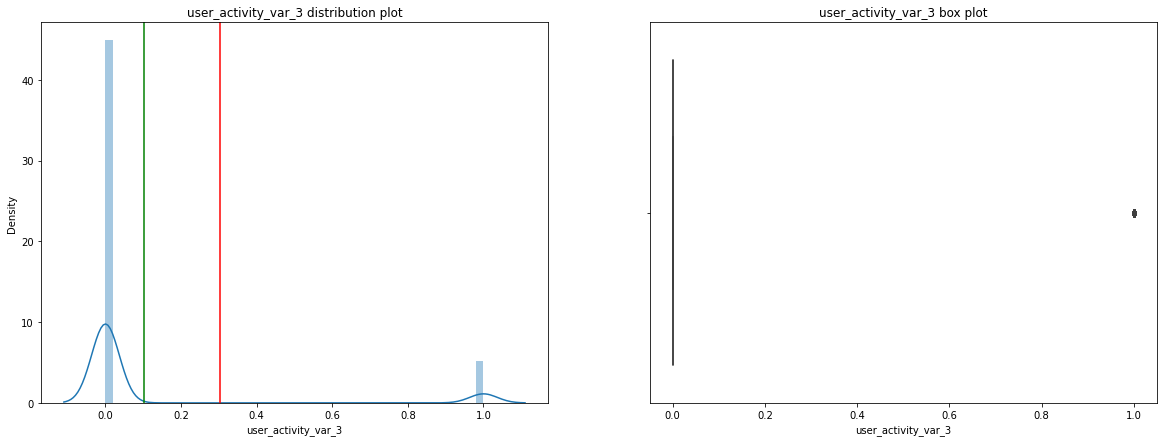

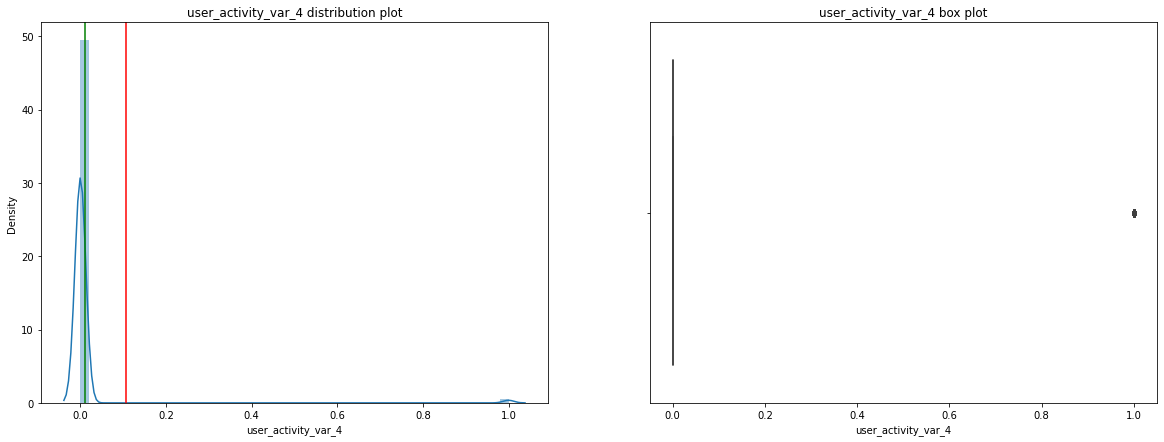

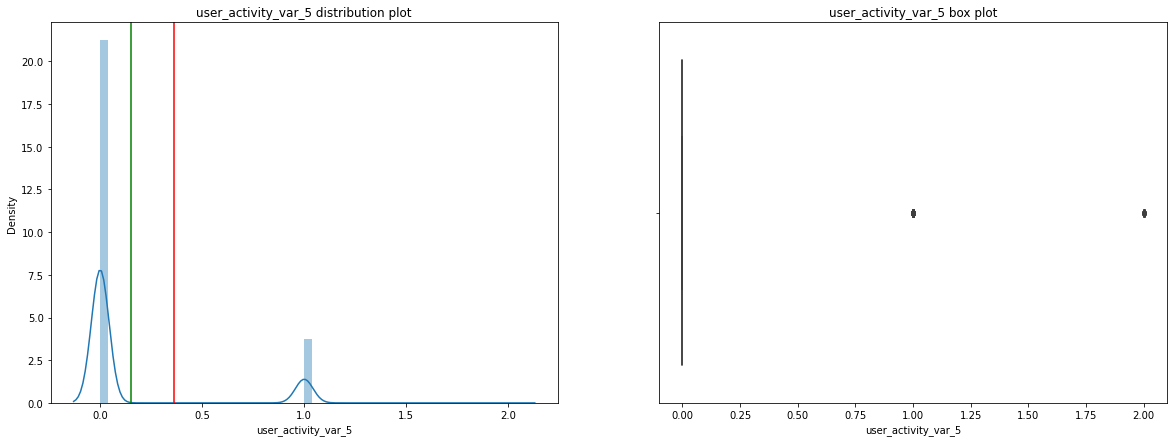

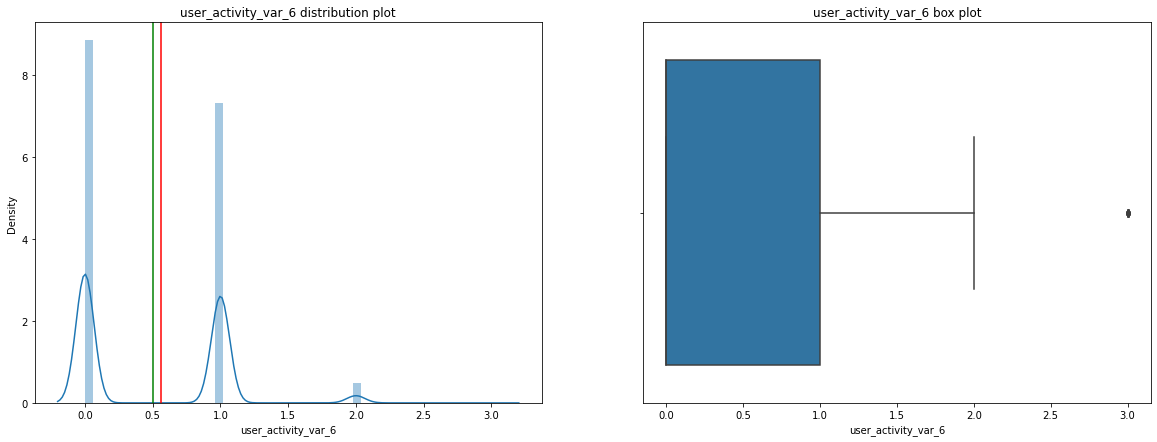

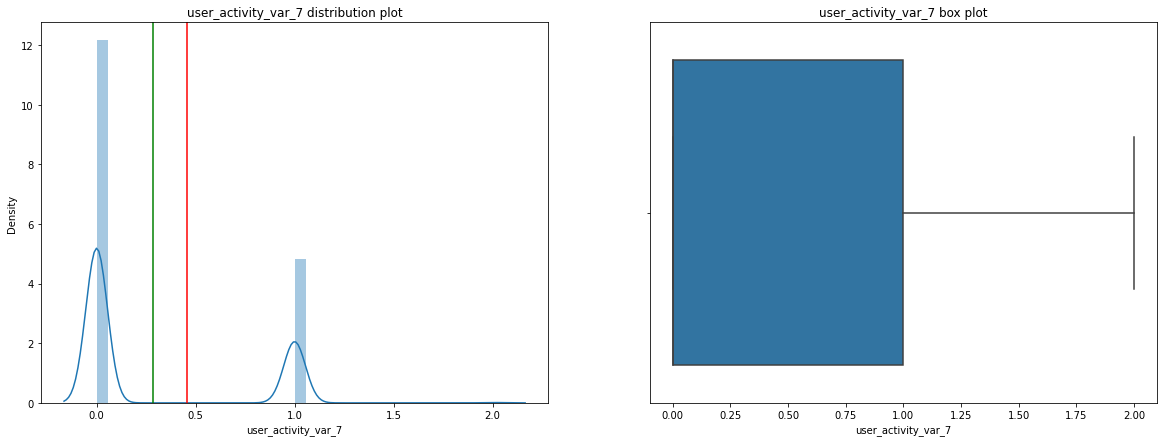

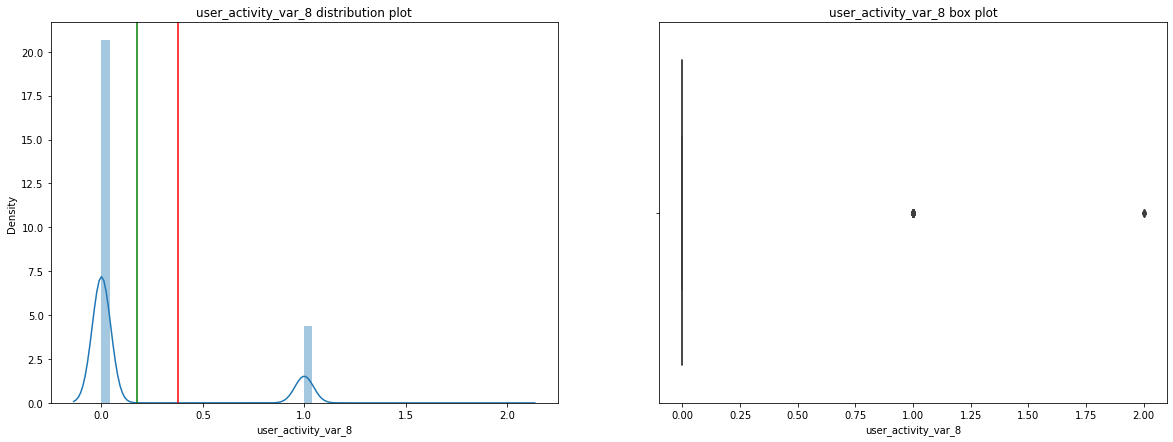

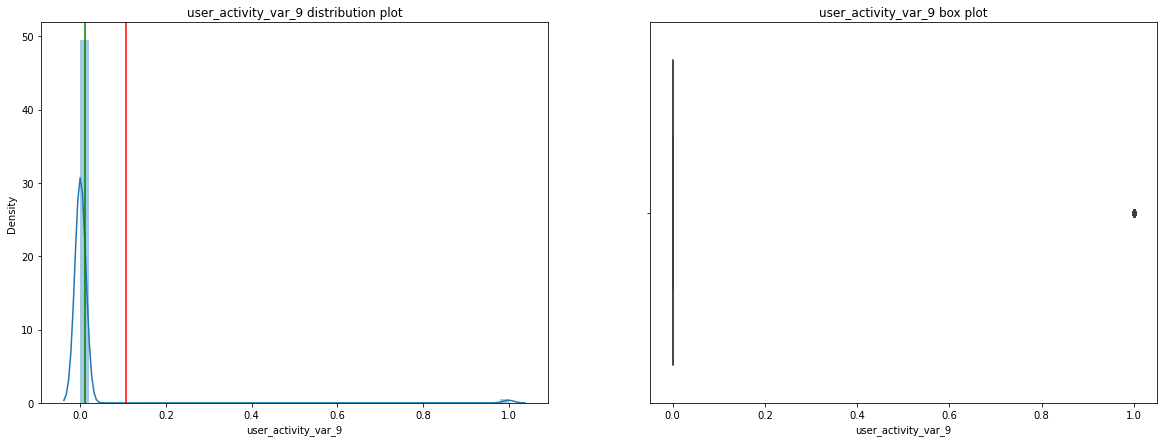

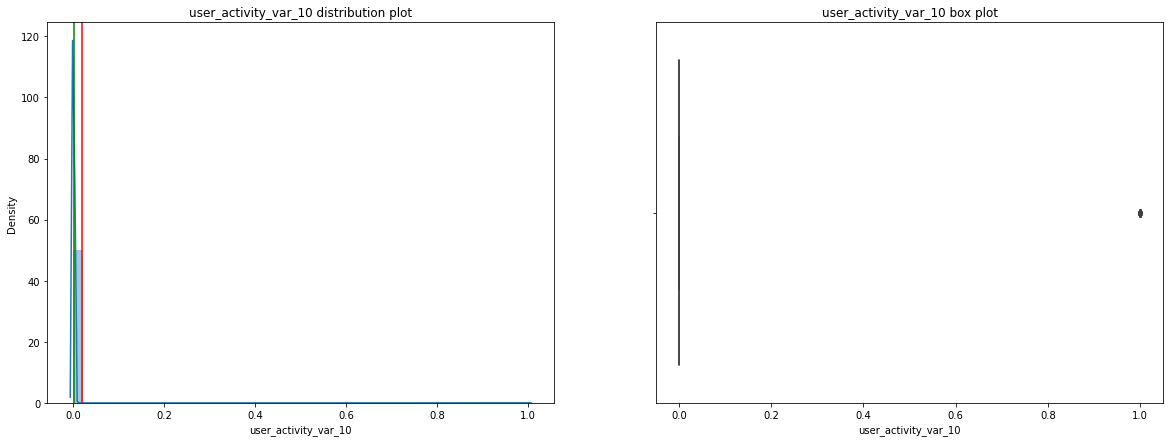

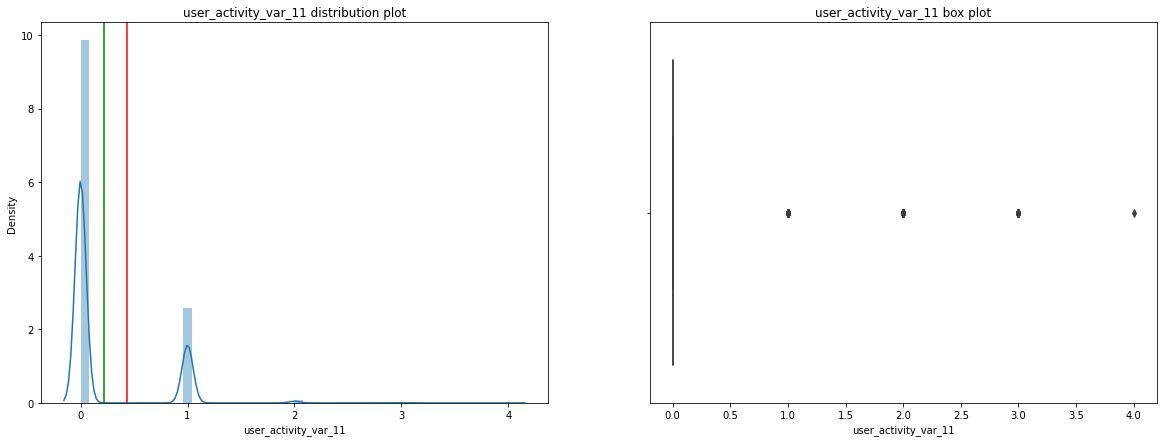

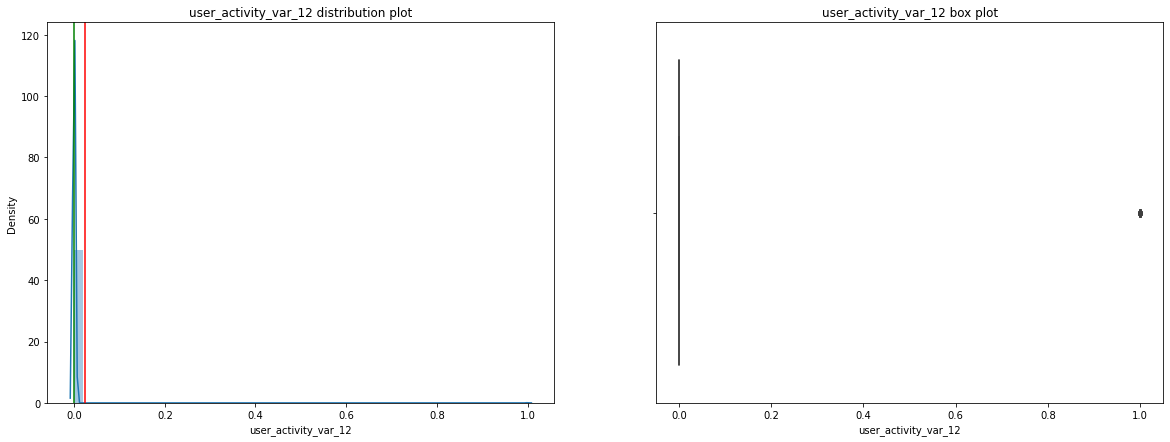

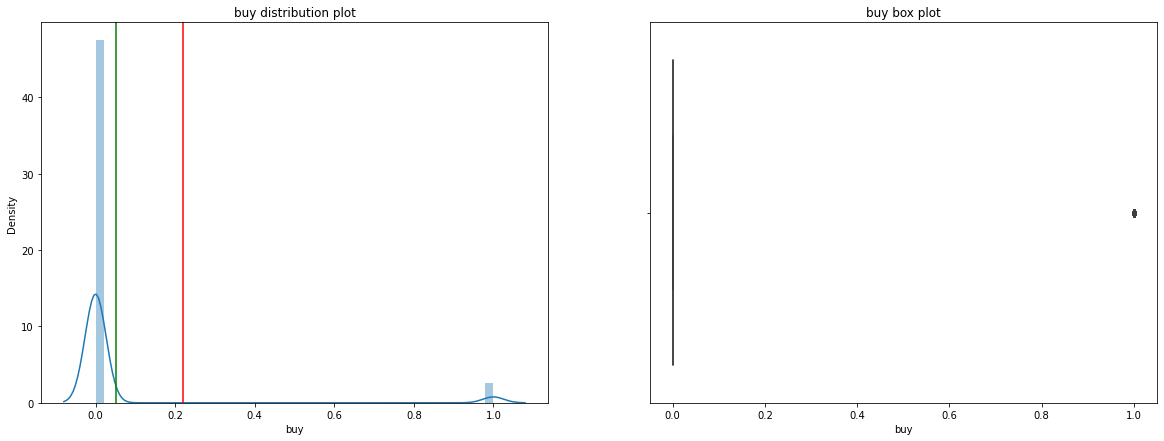

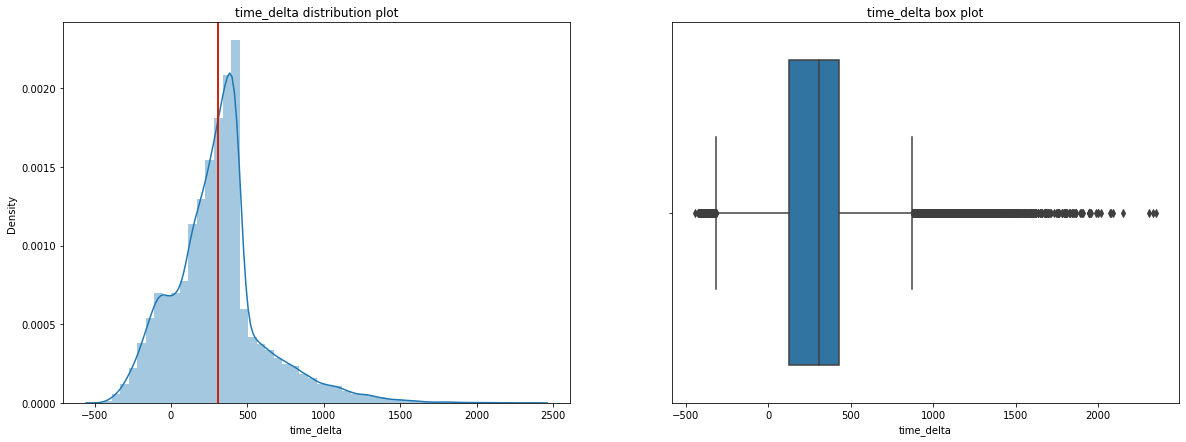

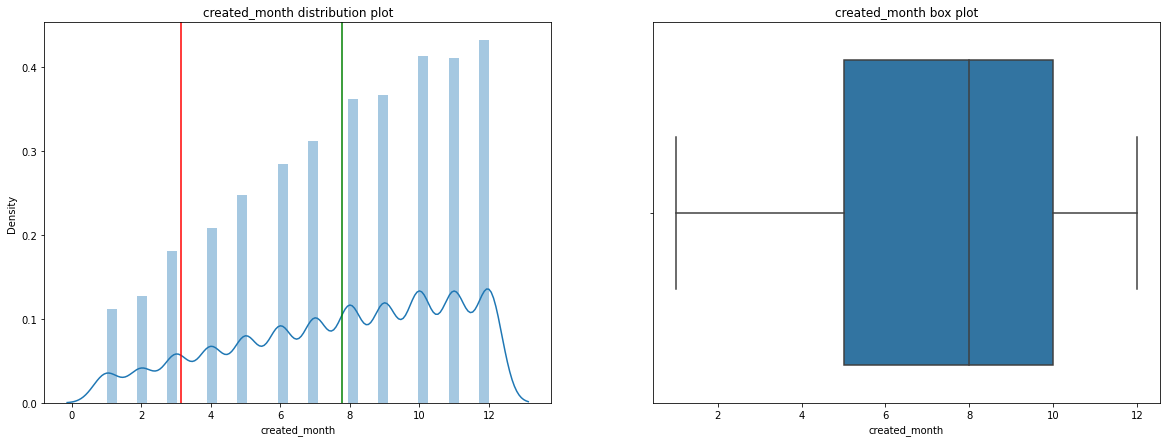

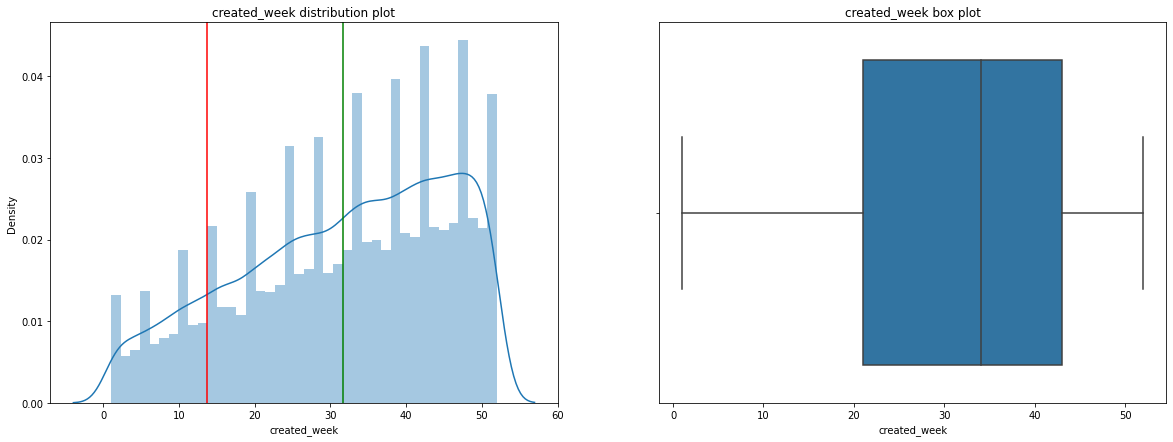

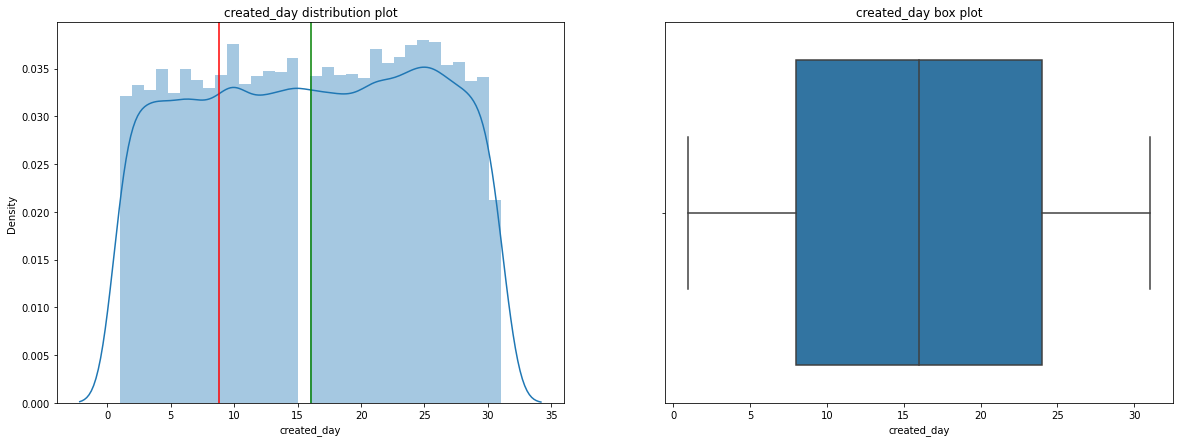

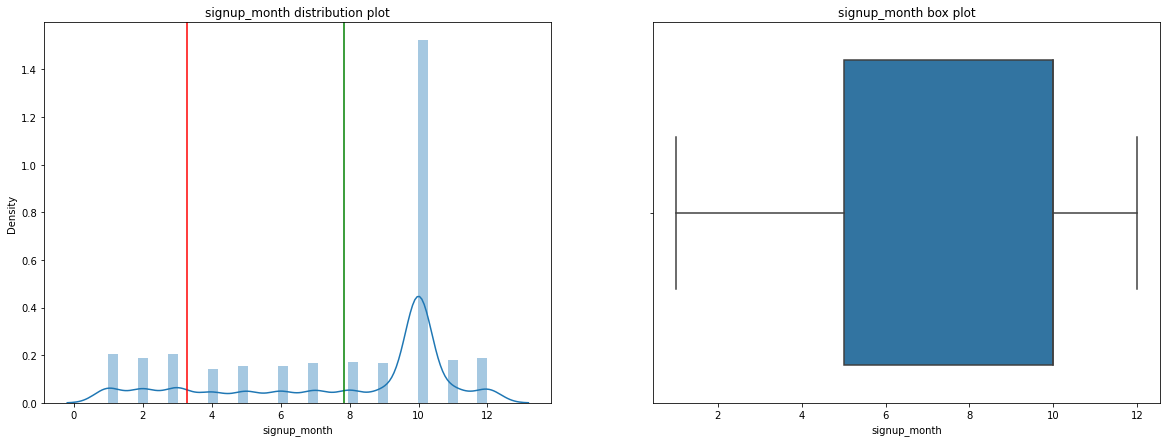

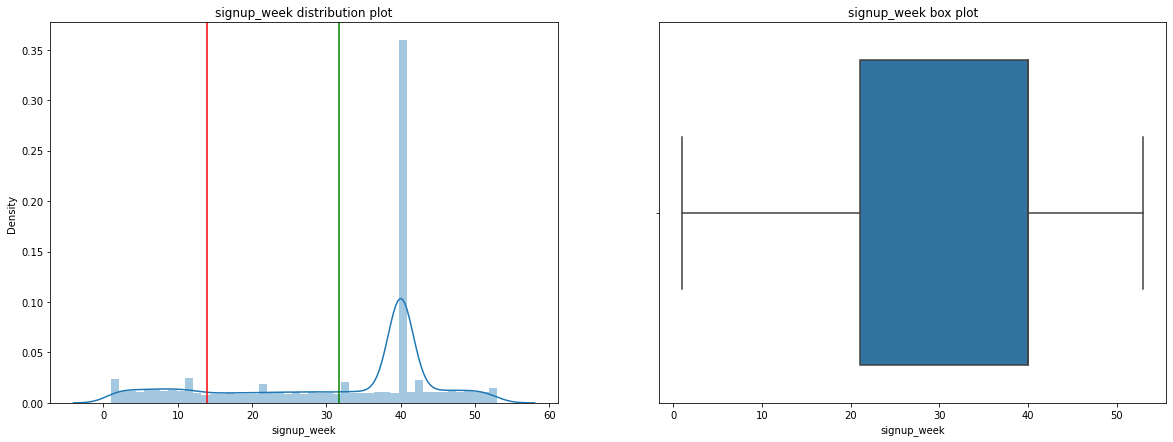

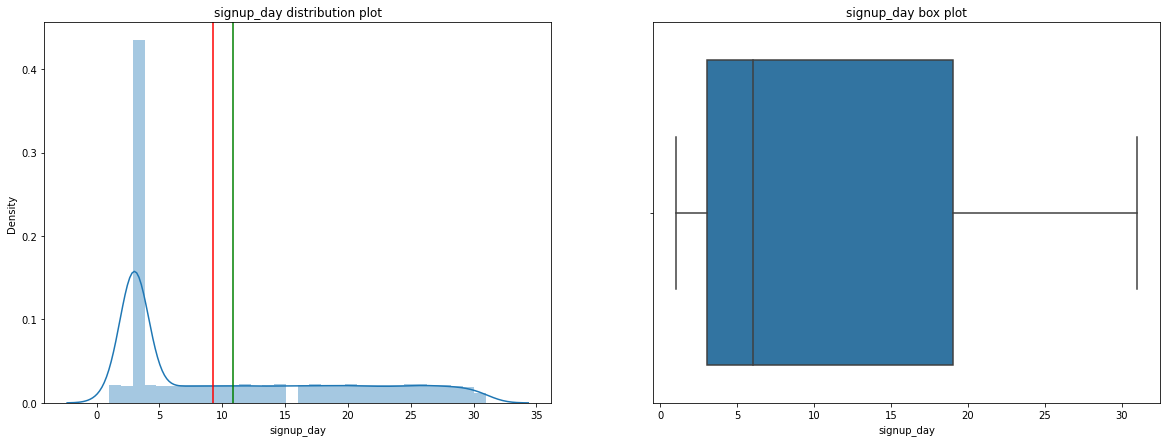

In [27]:
for feature in df_train_cleaned.columns:
    view_feature_plots(df_train_cleaned[feature])

#### Observations:
1. Most of the features follow gaussian distribution and some of the features are left skewed. eg. campaign_var_1 and campaign_var_2
2. Also, time_delta (derived feature) has left skewed distribution. Boxplot of 'time_delta' clearly show some outliers in the feature. 

In [28]:
def remove_outliers(df):
    """
    Summary:
        utility function to remove outliers using Inter-Quartile-Range (IQR) method 
    
    Parameters:
        df (Dataframe): Pandas Series for given feature
    
    Returns:
        df_outlier_removed(Dataframe): Pandas dataframe without outliers
    """
    df_outlier_removed = df.copy()
    for i in [i for i in df_outlier_removed.columns]:
        if df_outlier_removed[i].nunique()>=12:
            Q1 = df_outlier_removed[i].quantile(0.25)
            Q3 = df_outlier_removed[i].quantile(0.75)
            IQR = Q3 - Q1
            df_outlier_removed = df_outlier_removed[df_outlier_removed[i] <= (Q3+(1.5*IQR))]
            df_outlier_removed = df_outlier_removed[df_outlier_removed[i] >= (Q1-(1.5*IQR))]
    df_outlier_removed = df_outlier_removed.reset_index(drop=True)
    return df_outlier_removed

In [29]:
drop_cols = ['user_activity_var_10', 'user_activity_var_12']
df_train_cleaned = drop_features(df_train_cleaned, 
                                 drop_columns=drop_cols)

### Predictive Modelling

In [30]:
# features
X = df_train_cleaned.drop('buy', axis = 1)
# labels
y = df_train_cleaned['buy']

In [31]:
# train-test split in 70:30 proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

#### Since this is a binary classification problem, we'll use below classification algorithms and choose the best performing model.
1. Random Forest Classifier(RF)
2. Support Vector Machine(SVM)
3. Logistic Regression(LR)

In [32]:
def apply_standard_scaler(feature_matrix):
    """
    Summary:
        utility function to apply standardization on features in feature matrix  
    Parameters:
        feature_matrix : Feature Dataframe 
    Returns:
        feature_matrix_scaled: Scaled feature matrix
    """
    scaler = StandardScaler()
    feature_matrix_scaled = scaler.fit_transform(feature_matrix)
    return feature_matrix_scaled

def plot_confusion_matrix(y_test, y_pred):
    """
    Summary:
        utility function to plot confusion-matrix
    Parameters:
        y_test: test labels
        y_pred: predicted labels on test data
    """
    plt.figure(figsize=(10,8))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', annot_kws={"size": 16})
    ax.set_title('Confusion Matrix with Labels\n\n');
    ax.set_xlabel('\nPredicted Label')
    ax.set_ylabel('Actual Label');
    plt.show()
    
def train_ml_models(X_train, y_train, X_test, y_test, n_folds=5):
    """
    Summary:
        utility function to train ML classification models 
    Parameters:
        X_train: training data
        y_train: training labels
        X_test: test data
        y_test: test labels
        n_folds(default=5): number of folds for k-fold cross validation
    """
    models = [RandomForestClassifier(n_estimators=200),
              SVC(),
              LogisticRegression()]
    for model in  models:
        print(f"---------------Training started for {model.__class__.__name__}---------------")
        start = time.time() 
        if model.__class__.__name__ != 'RandomForestClassifier':
            X_train = apply_standard_scaler(X_train)
            X_test = apply_standard_scaler(X_test)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Accuracy of {model.__class__.__name__} on test data: {accuracy_score(y_test, y_pred)}")
        print(f"Classification Report: \n {classification_report(y_test, y_pred)}")
        print(f"Confision Matrix:\n")
        plot_confusion_matrix(y_test, y_pred)
        print(f"---------------Applying {n_folds} fold cross validation on training data---------------")
        score = cross_val_score(model, X_train, y_train,cv=n_folds)
        print(f"Cross-Validation Score: {score}")
        print(f"Average Cross-Validation Score for {model.__class__.__name__}: {np.average(score)}")
        end=time.time()
        print(f"Training took {end - start} seconds.")
        print(f"--------------------------------------------------------------------")

---------------Training started for RandomForestClassifier---------------
Accuracy of RandomForestClassifier on test data: 0.9753170482594263
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     11143
           1       0.95      0.55      0.70       606

    accuracy                           0.98     11749
   macro avg       0.96      0.77      0.84     11749
weighted avg       0.97      0.98      0.97     11749

Confision Matrix:



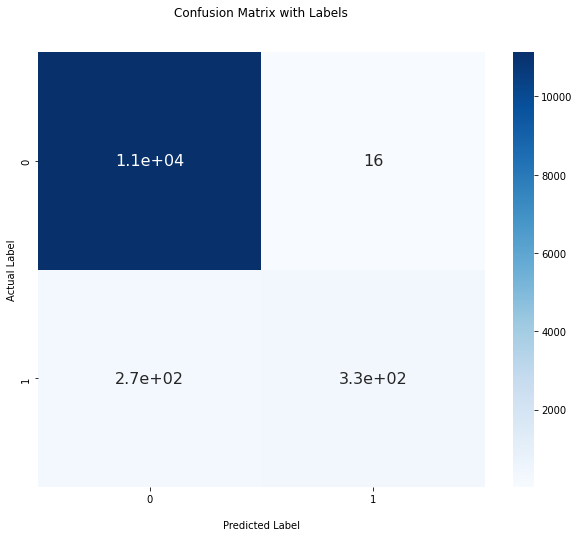

---------------Applying 5 fold cross validation on training data---------------
Cross-Validation Score: [0.97391939 0.97410177 0.97537395 0.97537395 0.97446188]
Average Cross-Validation Score for RandomForestClassifier: 0.9746461867509557
Training took 17.6390700340271 seconds.
--------------------------------------------------------------------
---------------Training started for SVC---------------
Accuracy of SVC on test data: 0.9751468210060431
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     11143
           1       0.96      0.54      0.69       606

    accuracy                           0.98     11749
   macro avg       0.97      0.77      0.84     11749
weighted avg       0.97      0.98      0.97     11749

Confision Matrix:



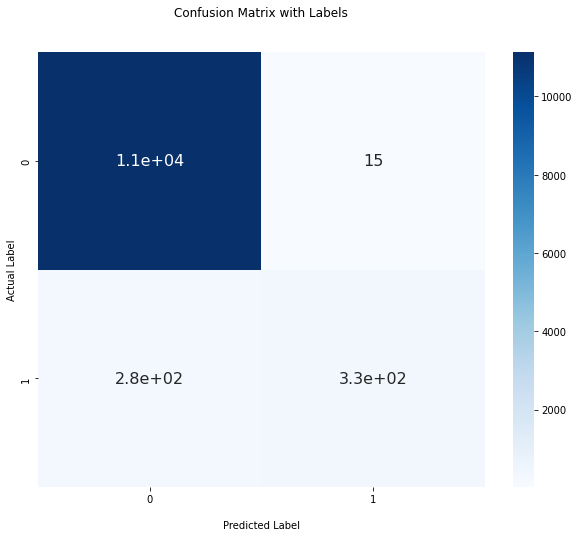

---------------Applying 5 fold cross validation on training data---------------
Cross-Validation Score: [0.97355462 0.97373701 0.97519154 0.97537395 0.97446188]
Average Cross-Validation Score for SVC: 0.9744637981893955
Training took 26.69037914276123 seconds.
--------------------------------------------------------------------
---------------Training started for LogisticRegression---------------
Accuracy of LogisticRegression on test data: 0.9738701166056686
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     11143
           1       0.96      0.52      0.67       606

    accuracy                           0.97     11749
   macro avg       0.97      0.76      0.83     11749
weighted avg       0.97      0.97      0.97     11749

Confision Matrix:



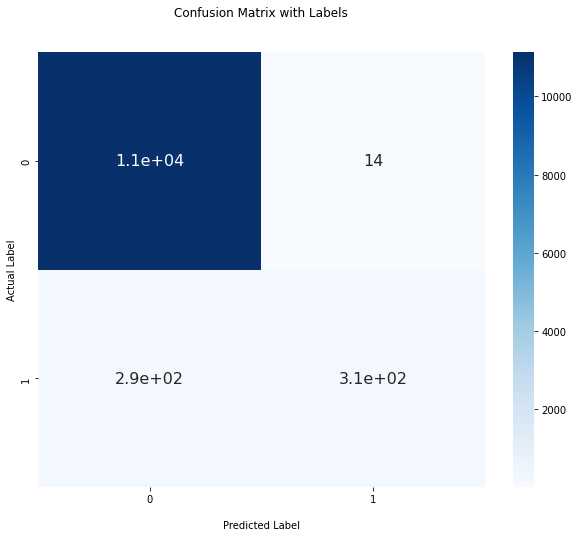

---------------Applying 5 fold cross validation on training data---------------
Cross-Validation Score: [0.97428415 0.97355462 0.97391463 0.97263772 0.97282014]
Average Cross-Validation Score for LogisticRegression: 0.9734422532369795
Training took 0.5785620212554932 seconds.
--------------------------------------------------------------------


In [33]:
train_ml_models(X_train, y_train, X_test, y_test, n_folds=5)

### Hyperparameter Tuning

In [34]:
# Hyper-Paramter tuning on Random Forest Classifier
# param_grid = { 
#     'n_estimators': [200, 300, 400, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8, 9, 10],
#     'criterion' :['gini', 'entropy']
# }
# model_cv = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
# model_cv.fit(X_train, y_train)
# print(f"Tuned hpyerparameters :(best parameters) {model_cv.best_params_}")
# print("Accuracy :",model_cv.best_score_)

In [35]:
final_model = RandomForestClassifier(n_estimators=200, max_features='auto', criterion='gini', max_depth=10)
final_model.fit(X, y)

RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=200)

In [36]:
def save_trained_model(model, model_path):
    """
    Summary:
        utility function to save trained ML model
    Parameters:
        model: trained ML model
        model_path: model file path
    """
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
        print(f"Model saved successfully at {model_path}!\n")

def load_trained_model(model_path):
    """
    Summary:
        utility function to load saved ML model
    Parameters:
        model_path: model file path
    Returns:
        model: loaded trained model
    """
    model = None
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
        print(f"Loaded trained model:{model.__class__.__name__} successfully!")
    return model

In [37]:
model_path = 'final_trained_model_rf.pkl'
save_trained_model(final_model, model_path)

Model saved successfully at final_trained_model_rf.pkl!



### Prediction

In [38]:
# load testing data
df_test = pd.read_csv('test_Wf7sxXF.csv')

In [39]:
# view testing data
df_test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [40]:
df_test.shape

(13184, 18)

In [41]:
# check for number of missing values in each column in descending order
df_test.isnull().sum().sort_values(ascending=False)

products_purchased      8136
signup_date             6649
id                         0
user_activity_var_5        0
user_activity_var_11       0
user_activity_var_10       0
user_activity_var_9        0
user_activity_var_8        0
user_activity_var_7        0
user_activity_var_6        0
user_activity_var_4        0
created_at                 0
user_activity_var_3        0
user_activity_var_2        0
user_activity_var_1        0
campaign_var_2             0
campaign_var_1             0
user_activity_var_12       0
dtype: int64

In [42]:
# preprocess test data
df_test_cleaned = preprocess(df_test)

In [43]:
# again check for missing values
df_test.isnull().sum().sort_values(ascending=False)

id                      0
user_activity_var_8     0
signup_week             0
signup_month            0
created_day             0
created_week            0
created_month           0
time_delta              0
user_activity_var_12    0
user_activity_var_11    0
user_activity_var_10    0
user_activity_var_9     0
user_activity_var_7     0
created_at              0
user_activity_var_6     0
user_activity_var_5     0
user_activity_var_4     0
user_activity_var_3     0
user_activity_var_2     0
user_activity_var_1     0
signup_date             0
products_purchased      0
campaign_var_2          0
campaign_var_1          0
signup_day              0
dtype: int64

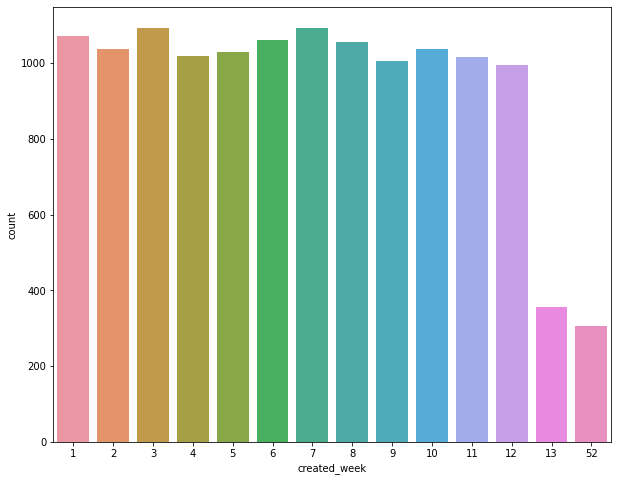

In [44]:
# check for created_week column (exceptional case after preprocessing data)
plt.figure(figsize=(10,8))
sns.countplot(x ='created_week', data = df_test_cleaned)
plt.show()

In [45]:
""" NOTE: The first few days of the year are counted as 52 as that week begins in the prior year. 
          So, we replace '52' with '1'
"""
df_test_cleaned['created_week'] = df_test_cleaned['created_week'].replace(to_replace =52, value = 1)

In [46]:
df_test_cleaned = drop_features(df_test_cleaned, 
                                 drop_columns=drop_cols)

In [47]:
# view cleaned test data
df_test_cleaned.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_11,time_delta,created_month,created_week,created_day,signup_month,signup_week,signup_day
0,2,2,0.0,1,1,0,0,0,1,0,0,0,1,137,1,1,1,8,33,17
1,4,7,3.0,1,0,0,0,0,0,0,1,0,0,590,1,1,1,5,21,21
2,8,7,0.0,0,0,0,0,1,1,0,0,0,0,321,1,1,1,2,6,13
3,9,8,2.0,0,0,0,0,1,1,1,0,0,2,558,1,1,1,6,26,22
4,4,5,2.0,1,0,0,0,0,0,0,0,0,0,297,1,1,1,3,10,10


In [48]:
# load saved model
model = load_trained_model(model_path)

Loaded trained model:RandomForestClassifier successfully!


In [49]:
# perform prediction on test data
test_predictions = model.predict(df_test_cleaned)

In [50]:
# save predictions in an output file
output_file_path = 'submission.csv'
output_df = pd.DataFrame(df_test['id']) 
output_df['buy'] = test_predictions
output_df.to_csv(output_file_path, encoding='UTF-8', index=False)